In [1]:
import obi_one as obi

In [2]:
from caveclient import CAVEclient
client = CAVEclient()
client.auth.setup_token(make_new=True)

New Tokens need to be acquired by hand. Please follow the following steps:
                1) Go to: https://global.daf-apis.com/auth/api/v1/create_token to create a new token.
                2) Log in with your Google credentials and copy the token shown afterward.
                3a) Save it to your computer with: client.auth.save_token(token="PASTE_YOUR_TOKEN_HERE")
                or
                3b) Set it for the current session only with client.auth.token = "PASTE_YOUR_TOKEN_HERE"
                Note: If you need to save or load multiple tokens, please read the documentation for details.
                Warning! Creating a new token by finishing step 2 will invalidate the previous token!


In [2]:
from caveclient import CAVEclient
url = "https://global.brain-wire-test.org/"
client = CAVEclient(server_address=url)
client.auth.setup_token(make_new=True)

New Tokens need to be acquired by hand. Please follow the following steps:
                1) Go to: https://global.brain-wire-test.org//auth/api/v1/create_token to create a new token.
                2) Log in with your Google credentials and copy the token shown afterward.
                3a) Save it to your computer with: client.auth.save_token(token="PASTE_YOUR_TOKEN_HERE")
                or
                3b) Set it for the current session only with client.auth.token = "PASTE_YOUR_TOKEN_HERE"
                Note: If you need to save or load multiple tokens, please read the documentation for details.
                Warning! Creating a new token by finishing step 2 will invalidate the previous token!


## Run for H01

In [ ]:
# H01 H01 H01
neuron_types = ["PYRAMIDAL", "INTERNEURON", "SPINY_ATYPICAL", "UNCLASSIFIED_NEURON", "SPINY_STELLATE"]
url = "https://global.brain-wire-test.org/"

form = obi.EMSonataNodesFiles(
    cave_client_token=None,
    initialize=obi.EMSonataNodesFiles.Initialize(
        client_version=751,
        client_server=url,
        client_name="h01_c3_flat",
        table_names=("cells", "nucleus"),
        nodes_filters={"celltype": neuron_types, "valid": "t"},
        population_name="h01_intrinsic",
        table_cols=("volume", "pt_supervoxel_id", "cell_type", "c3_rep_manual", "proofread_104_rep", "celltype", "layer"),
        naming_patterns=("{c3_rep_manual}.swc", "{c3_rep_manual}-spines.json"),
        morphology_root="/Users/mwr/OneDrive - Open Brain Institute/Marwan Abdellah's files - L23 Morphologies - Stage 2 - 26.05.2025",
        somas_file="/Users/mwr/Downloads/somas.csv"
    )
)

grid_scan = obi.GridScan(form=form, output_root='../../obi-output/h01_to_sonata_nodes')
grid_scan.execute(processing_method='run')


Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO/issues/457

Soma must be a contour for ASC and H5: see https://github.com/BlueBrain/MorphIO

create_bbp_workflow_campaign_config() not yet complete.


{0: None}

In [ ]:
url = "https://global.brain-wire-test.org/"
form = obi.EMSonataEdgesFiles(
    cave_client_token=None,
    initialize=obi.EMSonataEdgesFiles.Initialize(
        client_server=url,
        client_name="h01_c3_flat",
        client_version=751,
        intrinsic_nodes="../../obi-output/h01_to_sonata_nodes/EMSonataNodesFile/intrinsic_nodes.h5",
        virtual_nodes="../../obi-output/h01_to_sonata_nodes/EMSonataNodesFile/virtual_nodes.h5",
        extrinsic_nodes="extrinsic_nodes.h5",
        morphologies_dir="../../obi-output/h01_to_sonata_nodes/EMSonataNodesFile/morphologies",
        spines_dir="/Users/mwr/OneDrive - Open Brain Institute/Marwan Abdellah's files - L23 Morphologies - Stage 2 - 26.05.2025",
        morphologies_are_transformed=True
    )
)

cpl_scan = obi.CoupledScan(form=form, output_root='../../obi-output/h01_to_sonata_edges', coordinate_directory_option="ZERO_INDEX")
cpl_scan.execute(processing_method='run')

1it [00:03,  3.18s/it]

9it [00:21,  2.39s/it]

11it [00:26,  2.54s/it]

18it [00:44,  2.95s/it]

22it [00:53,  2.58s/it]

27it [01:06,  2.70s/it]

44it [05:11, 64.55s/it]

48it [05:21, 17.52s/it]

49it [05:26, 13.55s/it]

56it [05:42,  3.45s/it]

64it [06:02,  2.77s/it]

86it [06:50,  4.78s/it]

create_bbp_workflow_campaign_config() not yet complete.


{0: None}

In [ ]:
import h5py 
from brainbuilder.utils.sonata.split_population import _write_indexes

def get_edge_pop_name(fn):
    with h5py.File(fn, "r") as h5:
        edge_pop_name = list(h5["edges"].keys())[0]
    return edge_pop_name

def get_node_pop_name(fn):
    with h5py.File(fn, "r") as h5:
        node_pop_name = list(h5["nodes"].keys())[0]
    return node_pop_name

def get_node_pop_count(fn):
    pop_name = get_node_pop_name(fn)
    with h5py.File(fn, "r") as h5:
        n = h5["nodes"][pop_name]["node_type_id"].shape[0]
    return n

import os
cfg_root = "../../obi-output"
intrinsic_edges = "h01_to_sonata_edges/0/intrinsic_edges.h5"
virtual_edges = "h01_to_sonata_edges/0/virtual_edges.h5"
extrinsic_edges = "h01_to_sonata_edges/0/extrinsic_edges.h5"
intrinsic_nodes = "h01_to_sonata_nodes/EMSonataNodesFile/intrinsic_nodes.h5"
morph_dir = "h01_to_sonata_nodes/EMSonataNodesFile/morphologies"
virtual_nodes = "h01_to_sonata_nodes/EMSonataNodesFile/virtual_nodes.h5"
extrinsic_nodes = "h01_to_sonata_edges/0/extrinsic_nodes.h5"

intrinsic_edge_pop_name = get_edge_pop_name(os.path.join(cfg_root, intrinsic_edges))
virtual_edge_pop_name = get_edge_pop_name(os.path.join(cfg_root, virtual_edges))
extrinsic_edge_pop_name = get_edge_pop_name(os.path.join(cfg_root, extrinsic_edges))
intrinsic_node_pop_name = get_node_pop_name(os.path.join(cfg_root, intrinsic_nodes))
virtual_node_pop_name = get_node_pop_name(os.path.join(cfg_root, virtual_nodes))
extrinsic_node_pop_name = get_node_pop_name(os.path.join(cfg_root, extrinsic_nodes))

intrinsic_count = get_node_pop_count(os.path.join(cfg_root, intrinsic_nodes))
virtual_count = get_node_pop_count(os.path.join(cfg_root, virtual_nodes))
extrinsic_count = get_node_pop_count(os.path.join(cfg_root, extrinsic_nodes))

_write_indexes(os.path.join(cfg_root, intrinsic_edges),
               intrinsic_edge_pop_name,
               intrinsic_count, intrinsic_count)
_write_indexes(os.path.join(cfg_root, virtual_edges),
               virtual_edge_pop_name,
               virtual_count, intrinsic_count)
_write_indexes(os.path.join(cfg_root, extrinsic_edges),
               extrinsic_edge_pop_name,
               extrinsic_count, intrinsic_count)

microns_cfg = {
  "components": {
    "biophysical_neuron_models_dir": "",
    "mechanisms_dir": "",
    "morphologies_dir": "",
    "point_neuron_models_dir": "",
    "synaptic_models_dir": "",
    "templates_dir": ""
  },
  "networks": {
    "edges": [
      {
        "edges_file": "$BASE_DIR/" + intrinsic_edges,
        "populations": {
          intrinsic_edge_pop_name: {
            "type": "chemical"
          }
        }
      },
      {
        "edges_file": "$BASE_DIR/" + virtual_edges,
        "populations": {
          virtual_edge_pop_name: {
            "type": "chemical"
          }
        }
      },
      {
        "edges_file": "$BASE_DIR/" + extrinsic_edges,
        "populations": {
          extrinsic_edge_pop_name: {
            "type": "chemical"
          }
        }
      }
    ],
    "nodes": [
      {
        "nodes_file": "$BASE_DIR/" + intrinsic_nodes,
        "populations": {
          intrinsic_node_pop_name: {
            "alternate_morphologies": {
              "h5v1": "$BASE_DIR/" + morph_dir
            },
            "biophysical_neuron_models_dir": "$BASE_DIR/emodels_hoc",
            "morphologies_dir": "$BASE_DIR/" + morph_dir,
            "type": "biophysical"
          }
        }
      },
      {
        "nodes_file": "$BASE_DIR/" + virtual_nodes,
        "populations": {
          virtual_node_pop_name: {
            "type": "virtual"
          }
        }
      },
      {
        "nodes_file": "$BASE_DIR/" + extrinsic_nodes,
        "populations": {
          extrinsic_node_pop_name: {
            "type": "virtual"
          }
        }
      }
    ]
  },
  "node_sets_file": "$BASE_DIR/node_sets.json",
  "version": 2.3,
  "manifest": {
    "$BASE_DIR": "./"
  }
}

with open(os.path.join(cfg_root, "circuit_config_h01.json"), "w") as fid:
    import json
    json.dump(microns_cfg, fid, indent=4)

In [28]:
import bluepysnap as snap
import neurom.view

from conntility.circuit_models.neuron_groups import load_filter
from conntility import ConnectivityMatrix

circ = snap.Circuit("../../obi-output/circuit_config_h01.json")
load_cfg = {
    "loading":{
        "properties": ["x", "y", "z", "morphology", "source__layer", "source__celltype"]
    }
}
sonata_props = load_filter(circ, load_cfg, node_population="h01_intrinsic")
u_morphs = sonata_props["morphology"].drop_duplicates()

load_cfg["filtering"] = [
        {
            "column": "morphology",
            "values": list(u_morphs[u_morphs != "_NONE"])
        }
]

M = ConnectivityMatrix.from_bluepy(circ, load_cfg, connectome='h01_intrinsic__h01_intrinsic__chemical')
print(M.vertices)
print(len(M.edges))

100%|██████████| 11/11 [00:00<00:00, 2258.20it/s]

    node_ids          morphology source__celltype source__layer         x  \
0          0  864691132285113195        PYRAMIDAL       Layer 2  3074.768   
1          8  864691132402436486        PYRAMIDAL       Layer 2  3036.520   
2         10  864691132354646947        PYRAMIDAL       Layer 2  3075.664   
3         17  864691132401190307        PYRAMIDAL       Layer 2  3047.328   
4         21  864691132365696056        PYRAMIDAL       Layer 2  3096.072   
5         26  864691132366775174        PYRAMIDAL       Layer 2  3005.072   
6         43  864691132372191622        PYRAMIDAL       Layer 2  3014.928   
7         47  864691132350531896        PYRAMIDAL       Layer 2  3001.432   
8         48  864691132400864931        PYRAMIDAL       Layer 2  2970.680   
9         55  864691132383451704        PYRAMIDAL       Layer 2  2990.120   
10        63  864691132300738211        PYRAMIDAL       Layer 2  3062.200   

           y       z  
0   1005.904  54.912  
1    959.136   4.224  
2   11

0 0 1093


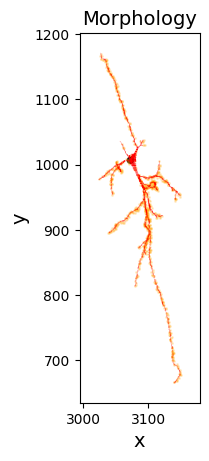

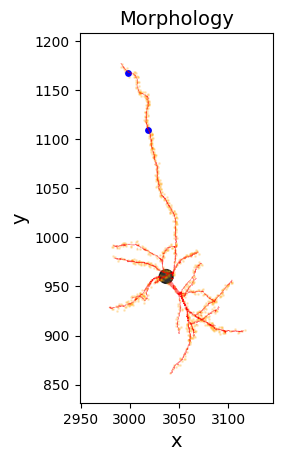

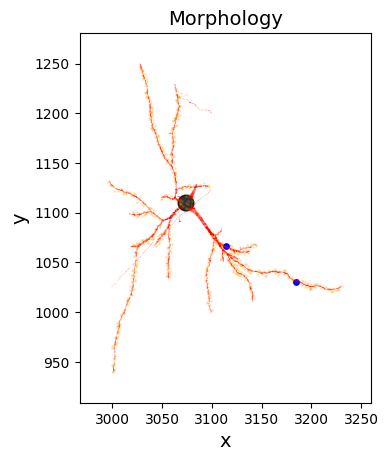

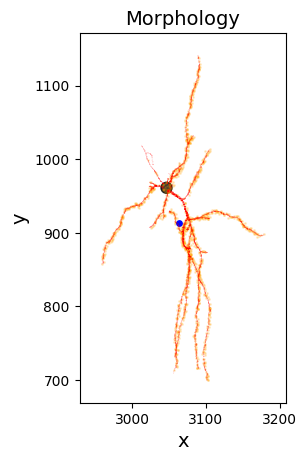

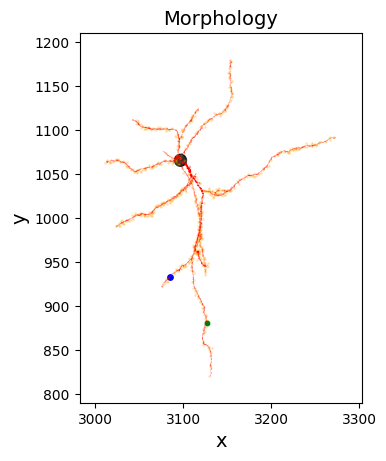

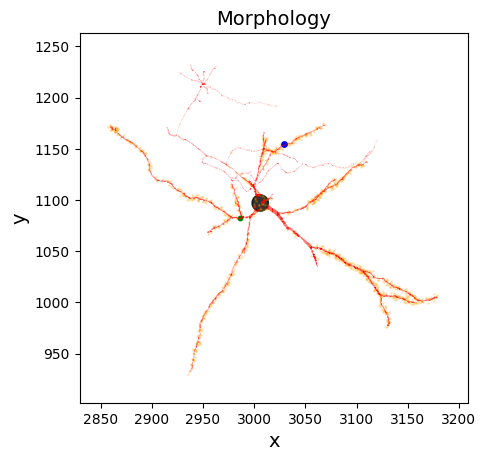

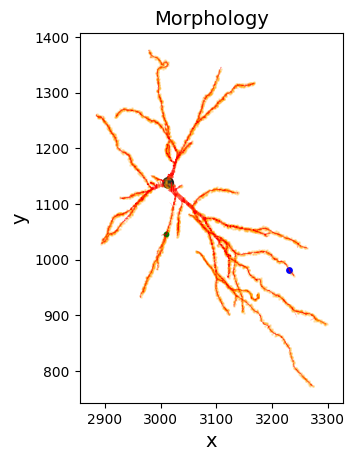

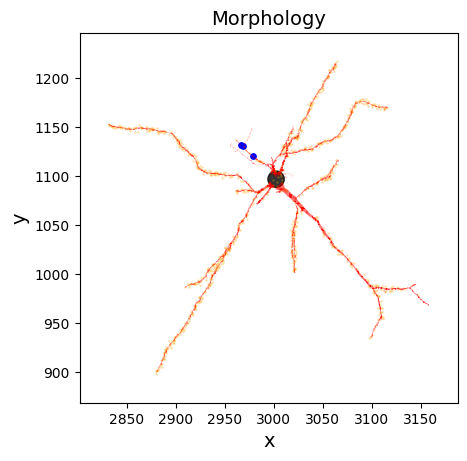

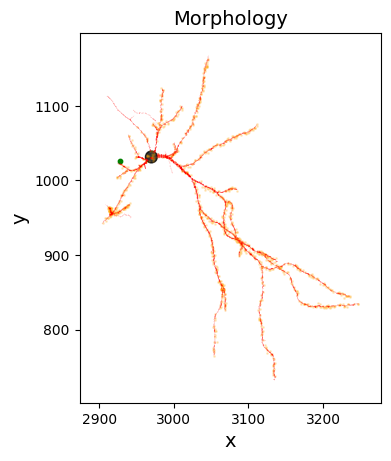

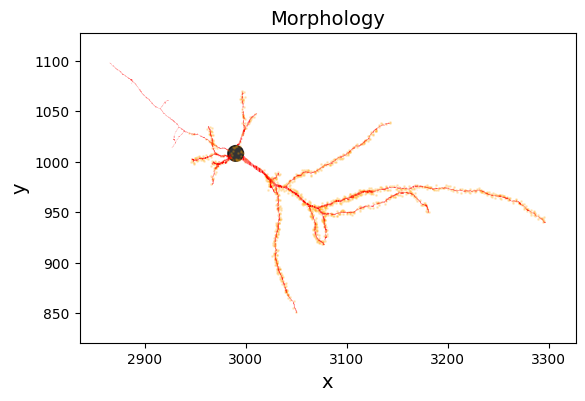

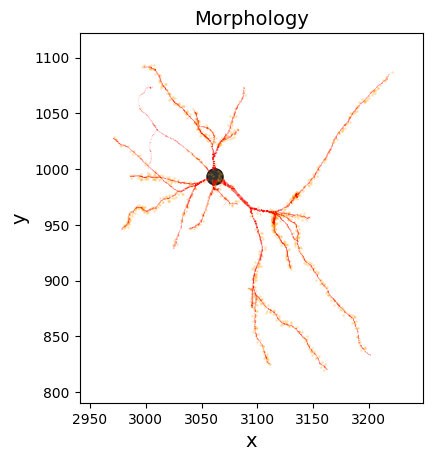

In [ ]:
from matplotlib import pyplot as plt

i_nodes = circ.nodes["h01_intrinsic"]
i_edges = circ.edges['h01_intrinsic__h01_intrinsic__chemical']
v_edges = circ.edges['virtual_h01_intrinsic__h01_intrinsic__chemical']
e_edges = circ.edges['em_extrinsic__h01_intrinsic__chemical']

for nid in M.vertices["node_ids"]:
    morph = i_nodes.morph.get(nid, transform=True)
    neurom.view.plot_morph(neurom.io.utils.Morphology(morph))
    e_syns = e_edges.afferent_edges(nid, properties=["afferent_synapse_x", "afferent_synapse_y", "afferent_synapse_z"])
    plt.gca().scatter(e_syns["afferent_synapse_x"], e_syns["afferent_synapse_y"], s=1, c="orange", alpha=0.2)
    i_syns = i_edges.afferent_edges(nid, properties=["afferent_synapse_x", "afferent_synapse_y", "afferent_synapse_z"])
    plt.gca().scatter(i_syns["afferent_synapse_x"], i_syns["afferent_synapse_y"], s=10, c="green")
    v_syns = v_edges.afferent_edges(nid, properties=["afferent_synapse_x", "afferent_synapse_y", "afferent_synapse_z"])
    plt.gca().scatter(v_syns["afferent_synapse_x"], v_syns["afferent_synapse_y"], s=15, c="blue")

print(len(i_syns), len(v_syns), len(e_syns))   

## Run for Microns

In [58]:
# MICRONS MICRONS MICRONS
form = obi.EMSonataNodesFiles(
    cave_client_token=None,
    initialize=obi.EMSonataNodesFiles.Initialize(
        client_version=343,
        table_names=('aibs_soma_nuc_metamodel_preds_v117', ),
        nodes_filters={"classification_system": "aibs_neuronal"},
        population_name="microns_intrinsic",
        table_cols=("volume", "pt_supervoxel_id", "cell_type"),
        morphology_root="/Users/mwr/Downloads"
    )
)

grid_scan = obi.GridScan(form=form, output_root='../../obi-output/microns_to_sonata_nodes')
grid_scan.execute(processing_method='run')


/Users/mwr/Downloads/864691134884786682.swc:3610:warning

/Users/mwr/Downloads/864691134884786682.swc:5609:warning

/Users/mwr/Downloads/864691134884786682.swc:5954:warning

/Users/mwr/Downloads/864691134884786682.swc:6216:warning

/Users/mwr/Downloads/864691134884786682.swc:6497:warning

/Users/mwr/Downloads/864691134884786682.swc:6673:warning

/Users/mwr/Downloads/864691134884786682.swc:6843:warning

/Users/mwr/Downloads/864691134884786682.swc:6933:warning

/Users/mwr/Downloads/864691134884786682.swc:7328:warning

/Users/mwr/Downloads/864691134884786682.swc:7716:warning

/Users/mwr/Downloads/864691134884786682.swc:9501:warning

/Users/mwr/Downloads/864691134884786682.swc:15815:warning

/Users/mwr/Downloads/864691134884786682.swc:21702:warning

/Users/mwr/Downloads/864691134884786682.swc:23691:warning

/Users/mwr/Downloads/864691134884786682.swc:32427:warning

/Users/mwr/Downloads/864691134884786682.swc:32738:warning

/Users/mwr/Downloads/864691134884786682.swc:37845:warning

Soma mu

create_bbp_workflow_campaign_config() not yet complete.


{0: None}

In [59]:
form = obi.EMSonataEdgesFiles(
    cave_client_token=None,
    initialize=obi.EMSonataEdgesFiles.Initialize(
        client_version=343,
        intrinsic_nodes="../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/intrinsic_nodes.h5",
        extrinsic_nodes="extrinsic_nodes.h5",
        morphologies_dir=["../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies",
                          "/Users/mwr/Downloads"],
        spines_dir="/Users/mwr/Downloads",
        morphologies_are_transformed=[True, False]
    )
)

cpl_scan = obi.CoupledScan(form=form, output_root='../../obi-output/microns_to_sonata_edges', coordinate_directory_option="ZERO_INDEX")
cpl_scan.execute(processing_method='run')


../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:3612:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:5611:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:5956:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6218:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6499:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6675:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6845:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6935:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:7330:warning

../../obi-output/m

1583 synapses to be mapped...



/Users/mwr/Downloads/864691134884786682.swc:3610:warning

/Users/mwr/Downloads/864691134884786682.swc:5609:warning

/Users/mwr/Downloads/864691134884786682.swc:5954:warning

/Users/mwr/Downloads/864691134884786682.swc:6216:warning

/Users/mwr/Downloads/864691134884786682.swc:6497:warning

/Users/mwr/Downloads/864691134884786682.swc:6673:warning

/Users/mwr/Downloads/864691134884786682.swc:6843:warning

/Users/mwr/Downloads/864691134884786682.swc:6933:warning

/Users/mwr/Downloads/864691134884786682.swc:7328:warning

/Users/mwr/Downloads/864691134884786682.swc:7716:warning

/Users/mwr/Downloads/864691134884786682.swc:9501:warning

/Users/mwr/Downloads/864691134884786682.swc:15815:warning

/Users/mwr/Downloads/864691134884786682.swc:21702:warning

/Users/mwr/Downloads/864691134884786682.swc:23691:warning

/Users/mwr/Downloads/864691134884786682.swc:32427:warning

/Users/mwr/Downloads/864691134884786682.swc:32738:warning

/Users/mwr/Downloads/864691134884786682.swc:37845:warning


1583 synapses to be mapped...
create_bbp_workflow_campaign_config() not yet complete.


{0: None, 1: None}

In [60]:
from obi_one.scientific.microns_to_sonata.utils_nodes import collection_to_neuron_info

extrinsics, extrinsic_name = collection_to_neuron_info("../../obi-output/microns_to_sonata_edges/0/extrinsic_nodes.h5",
                                                               must_exist=False)
display(extrinsics)
extrinsics, extrinsic_name = collection_to_neuron_info("../../obi-output/microns_to_sonata_edges/1/extrinsic_nodes.h5",
                                                               must_exist=False)
display(extrinsics)

,pt_root_id,x,y,z
0,864691136260055191,0.0,0.0,0.0
1,864691136120898965,0.0,0.0,0.0
2,864691134862999110,0.0,0.0,0.0
3,864691136719548388,0.0,0.0,0.0
4,864691135434614514,0.0,0.0,0.0
...,...,...,...,...
1259,864691135868292477,0.0,0.0,0.0
1260,864691136483203884,0.0,0.0,0.0
1261,864691136126820477,0.0,0.0,0.0
1262,864691136024372119,0.0,0.0,0.0


,pt_root_id,x,y,z
0,864691136260055191,0.0,0.0,0.0
1,864691136120898965,0.0,0.0,0.0
2,864691134862999110,0.0,0.0,0.0
3,864691136719548388,0.0,0.0,0.0
4,864691135434614514,0.0,0.0,0.0
...,...,...,...,...
1259,864691135868292477,0.0,0.0,0.0
1260,864691136483203884,0.0,0.0,0.0
1261,864691136126820477,0.0,0.0,0.0
1262,864691136024372119,0.0,0.0,0.0


In [61]:
import h5py

with h5py.File("../../obi-output/microns_to_sonata_edges/0/intrinsic_edges.h5", "r") as h5:
    edge_pop_name = list(h5["edges"].keys())[0]
    print("Edge population {0} properties".format(edge_pop_name))
    print(h5["edges"][edge_pop_name]["0"].keys())

    print("Mapping to source nodes:")
    print(h5["edges"][edge_pop_name]["source_node_id"][:])
    print("Mapping to target nodes:")
    print(h5["edges"][edge_pop_name]["target_node_id"][:])

with h5py.File("../../obi-output/microns_to_sonata_edges/0/extrinsic_edges.h5", "r") as h5:
    edge_pop_name = list(h5["edges"].keys())[0]
    print("Edge population {0} properties".format(edge_pop_name))
    print(h5["edges"][edge_pop_name]["0"].keys())

    print("Mapping to source nodes:")
    print(h5["edges"][edge_pop_name]["source_node_id"][:])
    print("Mapping to target nodes:")
    print(h5["edges"][edge_pop_name]["target_node_id"][:])

Edge population microns_intrinsic__microns_intrinsic__chemical properties
<KeysViewHDF5 ['afferent_section_id', 'afferent_section_offset', 'afferent_segment_id', 'afferent_segment_offset', 'afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', 'afferent_synapse_x', 'afferent_synapse_y', 'afferent_synapse_z', 'source__id', 'source__size', 'spine_id']>
Mapping to source nodes:
[50896 47187  6148 61645 61741 46666  4066 54345 19675 17999 44741 11616
 10433 10420 51476 43616 52202  3669 29295  6148 29295 54021 22971 55381
 30510 28777 54021 48178 11213  3143 25543 13205 33307  7229  7395 19762
 34700 56655 60117 11213 37184 15797 52982 43616 51987 60926 34906 22971
 13636 51918 15439  1788 40425 56877  7229 27309 51476 10884  7482  9914
 45584 36115 37426 34830  6768 17213 44630 33307 26235 35351 43025 61118
 10420 19992 33906 34706 26147 44630 31442 58051 19981 11609 56086 10763
 59282 16066  1381  5859 27085 13636  4732 10763 21255 54021 25608 59464
  2737  9914  1381 39608 21

In [62]:
import h5py, numpy, pandas

with h5py.File("../../obi-output/microns_to_sonata_edges/0/intrinsic_edges.h5", "r") as h5:
    edge_pop_name = list(h5["edges"].keys())[0]
    written_spine_ids = h5["edges"][edge_pop_name]["0/spine_id"][:]

with h5py.File("../../obi-output/microns_to_sonata_edges/0/extrinsic_edges.h5", "r") as h5:
    edge_pop_name = list(h5["edges"].keys())[0]
    written_spine_ids = numpy.hstack([written_spine_ids,
                                      h5["edges"][edge_pop_name]["0/spine_id"][:]])

pandas.Series(written_spine_ids).value_counts().sort_index()

-1       109
 0         2
 2         1
 3         1
 5         2
        ... 
 2010      1
 2011      1
 2012      1
 2013      1
 2020      1
Name: count, Length: 1189, dtype: int64

In [63]:
import voxcell

coll = voxcell.CellCollection.load_sonata("../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/intrinsic_nodes.h5")
df = coll.as_dataframe()
df = df.loc[df["morphology"] != "_NONE"]
node_info = df.iloc[0]

blck = obi.EMEdgesMappingBlock(
    client_version=343,
)

syns_nontf = blck.map_synapses_to_morphology("/Users/mwr/Downloads",
                                       "/Users/mwr/Downloads",
                                       node_info,
                                       morphologies_are_transformed=False)

syns_istf = blck.map_synapses_to_morphology("../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies",
                                       "/Users/mwr/Downloads",
                                       node_info,
                                       morphologies_are_transformed=True)


/Users/mwr/Downloads/864691134884786682.swc:3610:warning

/Users/mwr/Downloads/864691134884786682.swc:5609:warning

/Users/mwr/Downloads/864691134884786682.swc:5954:warning

/Users/mwr/Downloads/864691134884786682.swc:6216:warning

/Users/mwr/Downloads/864691134884786682.swc:6497:warning

/Users/mwr/Downloads/864691134884786682.swc:6673:warning

/Users/mwr/Downloads/864691134884786682.swc:6843:warning

/Users/mwr/Downloads/864691134884786682.swc:6933:warning

/Users/mwr/Downloads/864691134884786682.swc:7328:warning

/Users/mwr/Downloads/864691134884786682.swc:7716:warning

/Users/mwr/Downloads/864691134884786682.swc:9501:warning

/Users/mwr/Downloads/864691134884786682.swc:15815:warning

/Users/mwr/Downloads/864691134884786682.swc:21702:warning

/Users/mwr/Downloads/864691134884786682.swc:23691:warning

/Users/mwr/Downloads/864691134884786682.swc:32427:warning

/Users/mwr/Downloads/864691134884786682.swc:32738:warning

/Users/mwr/Downloads/864691134884786682.swc:37845:warning


1583 synapses to be mapped...



../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:3612:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:5611:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:5956:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6218:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6499:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6675:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6845:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:6935:warning

../../obi-output/microns_to_sonata_nodes/EMSonataNodesFile/morphologies/864691134884786682.swc:7330:warning

../../obi-output/m

1583 synapses to be mapped...


In [64]:
syns_istf["spine_id"] == syns_nontf["spine_id"]

0       True
1       True
2       True
3       True
4       True
        ... 
1578    True
1579    True
1580    True
1581    True
1582    True
Name: spine_id, Length: 1579, dtype: bool

In [ ]:
import h5py 
from brainbuilder.utils.sonata.split_population import _write_indexes

def get_edge_pop_name(fn):
    with h5py.File(fn, "r") as h5:
        edge_pop_name = list(h5["edges"].keys())[0]
    return edge_pop_name

def get_node_pop_name(fn):
    with h5py.File(fn, "r") as h5:
        node_pop_name = list(h5["nodes"].keys())[0]
    return node_pop_name

def get_node_pop_count(fn):
    pop_name = get_node_pop_name(fn)
    with h5py.File(fn, "r") as h5:
        n = h5["nodes"][pop_name]["node_type_id"].shape[0]
    return n

import os
cfg_root = "../../obi-output"
intrinsic_edges = "microns_to_sonata_edges/0/intrinsic_edges.h5"
extrinsic_edges = "microns_to_sonata_edges/0/extrinsic_edges.h5"
intrinsic_nodes = "microns_to_sonata_nodes/EMSonataNodesFile/intrinsic_nodes.h5"
morph_dir = "microns_to_sonata_nodes/EMSonataNodesFile/morphologies"
extrinsic_nodes = "microns_to_sonata_edges/0/extrinsic_nodes.h5"

intrinsic_edge_pop_name = get_edge_pop_name(os.path.join(cfg_root, intrinsic_edges))
extrinsic_edge_pop_name = get_edge_pop_name(os.path.join(cfg_root, extrinsic_edges))
intrinsic_node_pop_name = get_node_pop_name(os.path.join(cfg_root, intrinsic_nodes))
extrinsic_node_pop_name = get_node_pop_name(os.path.join(cfg_root, extrinsic_nodes))

intrinsic_count = get_node_pop_count(os.path.join(cfg_root, intrinsic_nodes))
extrinsic_count = get_node_pop_count(os.path.join(cfg_root, extrinsic_nodes))

_write_indexes(os.path.join(cfg_root, intrinsic_edges),
               intrinsic_edge_pop_name,
               intrinsic_count, intrinsic_count)

_write_indexes(os.path.join(cfg_root, extrinsic_edges),
               extrinsic_edge_pop_name,
               extrinsic_count, intrinsic_count)

microns_cfg = {
  "components": {
    "biophysical_neuron_models_dir": "",
    "mechanisms_dir": "",
    "morphologies_dir": "",
    "point_neuron_models_dir": "",
    "synaptic_models_dir": "",
    "templates_dir": ""
  },
  "networks": {
    "edges": [
      {
        "edges_file": "$BASE_DIR/" + intrinsic_edges,
        "populations": {
          intrinsic_edge_pop_name: {
            "type": "chemical"
          }
        }
      },
      {
        "edges_file": "$BASE_DIR/" + extrinsic_edges,
        "populations": {
          extrinsic_edge_pop_name: {
            "type": "chemical"
          }
        }
      }
    ],
    "nodes": [
      {
        "nodes_file": "$BASE_DIR/" + intrinsic_nodes,
        "populations": {
          intrinsic_node_pop_name: {
            "alternate_morphologies": {
              "h5v1": "$BASE_DIR/" + morph_dir
            },
            "biophysical_neuron_models_dir": "$BASE_DIR/emodels_hoc",
            "morphologies_dir": "$BASE_DIR/" + morph_dir,
            "type": "biophysical"
          }
        }
      },
      {
        "nodes_file": "$BASE_DIR/" + extrinsic_nodes,
        "populations": {
          extrinsic_node_pop_name: {
            "type": "virtual"
          }
        }
      }
    ]
  },
  "node_sets_file": "$BASE_DIR/node_sets.json",
  "version": 2.3,
  "manifest": {
    "$BASE_DIR": "./"
  }
}

with open(os.path.join(cfg_root, "circuit_config.json"), "w") as fid:
    import json
    json.dump(microns_cfg, fid, indent=4)

In [72]:
import bluepysnap as snap

circ = snap.Circuit(os.path.join(cfg_root, "circuit_config.json"))

In [78]:
node_props = circ.nodes["microns_intrinsic"].get()
display(node_props)
node_id = node_props.loc[node_props["morphology"] != "_NONE"].index[0]

,morphology,orientation_w,orientation_x,orientation_y,orientation_z,pt_root_id,source__cell_type,source__pt_supervoxel_id,source__volume,x,y,z
node_ids,,,,,,,,,,,,
0,_NONE,0.080093,-0.164385,0.0,0.983139,864691135864069246,4P,96416450524775690,299.161190,920.192,579.392,917.88
1,_NONE,0.080093,-0.164385,0.0,0.983139,864691135355924210,23P,93035795128494503,221.432709,822.144,492.096,692.28
2,_NONE,0.080093,-0.164385,0.0,0.983139,864691135799752546,23P,87479757654532700,258.697134,660.864,583.872,982.64
3,_NONE,0.080093,-0.164385,0.0,0.983139,864691136065264280,4P,82485363188337835,236.503204,516.224,636.224,865.12
4,_NONE,0.080093,-0.164385,0.0,0.983139,864691135724583083,23P,102467680883455325,235.090412,1097.728,564.672,724.24
...,...,...,...,...,...,...,...,...,...,...,...,...
62106,_NONE,0.080093,-0.164385,0.0,0.983139,864691135256151983,6P-IT,81510371520983981,292.497326,487.168,940.608,951.36
62107,_NONE,0.080093,-0.164385,0.0,0.983139,864691136266459124,6P-CT,113243375872150379,256.463176,1409.920,842.304,730.64
62108,_NONE,0.080093,-0.164385,0.0,0.983139,864691135815823439,23P,113367759333146727,341.404058,1414.976,353.408,1104.68


In [79]:
edges = circ.edges['microns_intrinsic__microns_intrinsic__chemical']

print(edges.afferent_nodes(node_id))
print(edges.property_names)
print(edges.afferent_edges(node_id, ['afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', 'spine_id']))

[  553  1381  1788  1981  2737  3118  3143  3365  3669  4066  4382  4732
  4869  5246  5510  5859  6148  6768  7229  7395  7482  8234  8633  9914
 10226 10420 10433 10763 10884 11213 11609 11616 13205 13636 14832 15439
 15797 15927 16066 16719 17213 17999 19675 19762 19777 19981 19992 21255
 22971 23306 23855 24776 25543 25608 26147 26235 27085 27309 27814 28777
 29295 30510 30916 31442 33307 33906 34700 34706 34830 34906 35351 36115
 36349 36640 37184 37270 37426 37610 38344 39608 40425 40695 43025 43550
 43616 44630 44741 44859 45584 46666 47187 48178 48804 50722 50896 51345
 51476 51918 51987 52036 52202 52982 53456 54021 54345 54684 55023 55381
 56086 56655 56877 58051 59282 59464 60117 60926 61118 61382 61645 61741]
{'afferent_section_id', 'afferent_surface_x', 'afferent_segment_offset', 'source__id', 'afferent_surface_y', 'afferent_synapse_y', 'afferent_segment_id', 'source__size', 'afferent_section_offset', 'afferent_synapse_x', 'afferent_synapse_z', 'spine_id', '@target_node', 

In [81]:
edges = circ.edges['microns_extrinsic__microns_intrinsic__chemical']

print(edges.afferent_nodes(node_id))
print(edges.property_names)
print(edges.afferent_edges(node_id, ['afferent_surface_x', 'afferent_surface_y', 'afferent_surface_z', 'spine_id']))

[   0    1    2 ... 1261 1262 1263]
{'afferent_section_id', 'afferent_surface_x', 'afferent_segment_offset', 'source__id', 'afferent_surface_y', 'afferent_synapse_y', 'afferent_segment_id', 'source__size', 'afferent_section_offset', 'afferent_synapse_x', 'afferent_synapse_z', 'spine_id', '@target_node', 'afferent_surface_z', '@source_node'}
      afferent_surface_x  afferent_surface_y  afferent_surface_z  spine_id
0             584.746277          607.988403          873.181152       488
1             569.120239          669.050598          919.169495       242
2             611.981934          642.755371          840.670227      1799
3             613.412476          591.925232          939.853271       892
4             649.451538          657.278259          812.560120      1944
...                  ...                 ...                 ...       ...
1398          640.152893          621.246094          936.882690      1076
1399          614.457886          588.679565          947

## Validating mapping via neuron locations

In [ ]:
from caveclient import CAVEclient

url = "https://global.brain-wire-test.org/"

client = CAVEclient(datastack_name="h01_c3_flat", server_address=url, auth_token=None)
client.version = 751
q_cells = client.materialize.query_table("cells")
q_cells = q_cells.loc[q_cells["pt_root_id"] > 0]

In [12]:
import pandas

somas = pandas.read_csv("/Users/mwr/Downloads/somas.csv")
somas.loc[somas["c3_rep_strict"].dropna().index]
somas["celltype"].value_counts()

celltype
OLIGO                  20139
PYRAMIDAL               8803
MG_OPC                  6536
ASTROCYTE               5474
INTERNEURON             4688
SPINY_ATYPICAL          1535
UNCLASSIFIED_NEURON      868
UNKNOWN                  692
BLOOD_VESSEL_CELL        285
SPINY_STELLATE           193
C_SHAPED                 166
Name: count, dtype: int64

In [56]:
from scipy.spatial import KDTree

t_somas = KDTree(somas[["x", "y", "z"]])
t_cave = KDTree(q_cells[["x", "y", "z"]])

matched = t_somas.query_ball_tree(t_cave, 1E-9) # For each entry in "somas" the matches

In [57]:
pandas.Series([len(_x) for _x in matched]).value_counts()

1    45740
0     3639
Name: count, dtype: int64

In [58]:
import numpy

somas["pt_root_id"] = numpy.hstack([q_cells.iloc[_x]["pt_root_id"].values if len(_x) > 0 else -1 for _x in matched])

In [59]:
somas.to_csv("/Users/mwr/Downloads/somas-pt_root_id-v751.csv")